In [2]:
import numpy as np
import pandas as pd
import sys
import statsmodels.formula.api as sm

In [3]:
df = pd.read_csv("year_prediction.csv")
df.describe()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [4]:
df.iloc[:, 0].value_counts()

2007    39404
2006    37534
2005    34952
2008    34760
2009    31038
2004    29607
2003    27382
2002    23451
2001    21590
2000    19285
1999    18238
1998    15814
1997    15182
1996    14130
1995    13257
1994    12121
1993    10525
1992     9543
2010     9396
1991     8647
1990     7256
1989     6670
1988     5611
1987     5122
1986     4219
1982     3597
1985     3578
1983     3386
1984     3368
1981     3162
        ...  
1950       83
1952       77
1951       74
1949       60
1947       57
1940       52
1928       52
1948       43
1927       42
1930       40
1931       35
1939       35
1941       32
1945       30
1946       29
1934       29
1937       28
1936       25
1935       24
1942       24
1926       19
1938       19
1944       15
1943       14
1932       11
1925        7
1922        6
1933        6
1924        5
2011        1
Name: label, Length: 89, dtype: int64

<IPython.core.display.Javascript object>


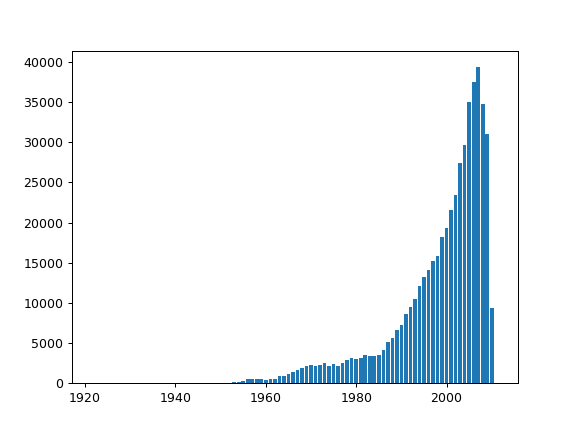

In [35]:
%matplotlib notebook

year = df.iloc[:, 0].value_counts().keys().tolist()
count = df.iloc[:, 0].value_counts().tolist()
import matplotlib.pyplot as plt

plt.bar(year, count)
plt.show()

In [5]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
x = np.append(arr = np.ones((515345, 1)).astype(int), values = x, axis = 1)

In [6]:
x1 = [x for x in range(0,91)]

In [7]:
x_opt = x[:, x1]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1778.
Date:                Tue, 29 May 2018   Prob (F-statistic):               0.00
Time:                        23:28:49   Log-Likelihood:            -1.8940e+06
No. Observations:              515345   AIC:                         3.788e+06
Df Residuals:                  515254   BIC:                         3.789e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1951.0371      0.190   1.03e+04      0.000    1950.666    1951.409
x1             0.8754      0.004    224.342      0.000       0.868       0.883
x2            -0.0563      0.000   -136.380      0.000      -0.057      -0.056
x3            -0.0436      0.001    -55.975      0.000      -0.045      -0.042
x4             0.0034      0.002      1.507      0.132      -0.001       0.008
x5            -0.0147      0.001    -20.426      0.000      -0.016      -0.013
x6            -0.2201      0.002    -88.852      0.000      -0.225      -0.215
x7            -0.0067      0.002     -4.401      0.000      -0.010      -0.004
x8            -0.1009      0.003    -33.969      0.000      -0.107      -0.095
x9            -0.0705      0.002    -38.952      0.000      -0.074      -0.067
x10            0.0251      0.004      6.367      0.000       0.017       0.033
x11           -0.1657      0.007    -25.421      0.000      -0.178      -0.153
x12           -0.0019      0.002     -0.888      0.375      -0.006       0.002
x13            0.0470      0.001     50.756      0.000       0.045       0.049
x14            0.0004   1.27e-05     27.873      0.000       0.000       0.000
x15           -0.0004      2e-05    -21.101      0.000      -0.000      -0.000
x16            0.0006   3.25e-05     18.417      0.000       0.001       0.001
x17            0.0005   4.48e-05     10.629      0.000       0.000       0.001
x18            0.0015   7.08e-05     20.715      0.000       0.001       0.002
x19            0.0019   8.54e-05     22.540      0.000       0.002       0.002
x20            0.0021      0.000     18.821      0.000       0.002       0.002
x21            0.0008      0.000      5.452      0.000       0.000       0.001
x22           -0.0004      0.000     -1.797      0.072      -0.001    3.66e-05
x23            0.0075      0.000     34.302      0.000       0.007       0.008
x24            0.0028      0.000     17.206      0.000       0.002       0.003
x25           -0.0036      0.000    -24.257      0.000      -0.004      -0.003
x26         7.114e-05   2.42e-05      2.937      0.003    2.37e-05       0.000
x27            0.0016   4.81e-05     33.043      0.000       0.001       0.002
x28            0.0005    7.8e-05      6.786      0.000       0.000       0.001
x29            0.0009      0.000      7.401      0.000       0.001       0.001
x30           -0.0003      0.000     -2.027      0.043      -0.001   -1.01e-05
x31           -0.0014      0.000     -7.301      0.000      -0.002      -0.001
x32           -0.0014      0.000     -5.580      0.000      -0.002      -0.001
x33           -0.0056      0.000    -17.560      0.000      -0.006      -0.005
x34            0.0025      0.000      6.949      0.000       0.002       0.003
x35            0.0018      0.001      3.571      0.000       0.001       0.003
x3

In [9]:
pvalues = np.array(regressor_ols.pvalues.astype(float))
pvalues = np.around(pvalues, decimals=2)

In [10]:
pvalues.argmax()

55

In [11]:
while (np.amax(pvalues)>0.05):
    x_opt = x[:, x1]
    regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
    regressor_ols.summary()
    pvalues = np.array(regressor_ols.pvalues.astype(float))
    pvalues = np.around(pvalues, decimals=2)
    if (np.amax(pvalues)<0.05):
        break
    ind = pvalues.argmax()
    del x1[ind]
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     2052.
Date:                Tue, 29 May 2018   Prob (F-statistic):               0.00
Time:                        23:29:52   Log-Likelihood:            -1.8941e+06
No. Observations:              515345   AIC:                         3.788e+06
Df Residuals:                  515266   BIC:                         3.789e+06
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1951.0000      0.185   1.05e+04      0.000    1950.637    1951.363
x1             0.8747      0.004    228.305      0.000       0.867       0.882
x2            -0.0564      0.000   -143.744      0.000      -0.057      -0.056
x3            -0.0425      0.001    -74.459      0.000      -0.044      -0.041
x4            -0.0147      0.001    -20.969      0.000      -0.016      -0.013
x5            -0.2201      0.002   -104.156      0.000      -0.224      -0.216
x6            -0.0063      0.001     -5.092      0.000      -0.009      -0.004
x7            -0.1005      0.003    -35.713      0.000      -0.106      -0.095
x8            -0.0709      0.002    -41.092      0.000      -0.074      -0.068
x9             0.0270      0.004      7.572      0.000       0.020       0.034
x10           -0.1664      0.005    -36.536      0.000      -0.175      -0.157
x11            0.0464      0.001     57.384      0.000       0.045       0.048
x12            0.0004   1.22e-05     28.848      0.000       0.000       0.000
x13           -0.0004   1.97e-05    -21.179      0.000      -0.000      -0.000
x14            0.0006    3.2e-05     19.053      0.000       0.001       0.001
x15            0.0005   4.28e-05     11.063      0.000       0.000       0.001
x16            0.0015   6.62e-05     22.691      0.000       0.001       0.002
x17            0.0019   8.43e-05     22.511      0.000       0.002       0.002
x18            0.0021    9.8e-05     20.945      0.000       0.002       0.002
x19            0.0006      0.000      4.822      0.000       0.000       0.001
x20            0.0076      0.000     37.204      0.000       0.007       0.008
x21            0.0028      0.000     17.215      0.000       0.002       0.003
x22           -0.0035      0.000    -24.446      0.000      -0.004      -0.003
x23         7.546e-05   2.35e-05      3.208      0.001    2.94e-05       0.000
x24            0.0016   4.73e-05     33.287      0.000       0.001       0.002
x25            0.0005   7.72e-05      7.085      0.000       0.000       0.001
x26            0.0008      0.000      7.306      0.000       0.001       0.001
x27           -0.0003      0.000     -2.227      0.026      -0.001   -3.96e-05
x28           -0.0014      0.000     -7.291      0.000      -0.002      -0.001
x29           -0.0015      0.000     -6.189      0.000      -0.002      -0.001
x30           -0.0055      0.000    -17.616      0.000      -0.006      -0.005
x31            0.0023      0.000      6.908      0.000       0.002       0.003
x32            0.0020      0.001      3.872      0.000       0.001       0.003
x33           -0.0053      0.000    -27.244      0.000      -0.006      -0.005
x34           -0.0003    4.3e-05     -6.331      0.000      -0.000      -0.000
x35            0.0007   4.05e-05     16.724      0.000       0.001       0.001
x3

In [12]:
ind

61

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size = 0.3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 2001.69268914,  1995.70404377,  1990.18157335, ...,  2000.13341527,
        2001.00611566,  2000.93296513])

In [17]:
y_test

array([2007, 1993, 1993, ..., 2007, 1999, 2000])

In [18]:
#10 fold cross validation to determine the accuracy of the model
# estimator is the object through which data was fitted, cv is number of folds 10 is most prominent, n_jobs=-1 means
# use all CPUs
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10, n_jobs = -1)

In [24]:
print("****10 accuracies*****",accuracies)
print("****Mean of accuracies*****",accuracies.mean())
print("****Standard deviation of accuracies*****",accuracies.std())

****10 accuracies***** [ 0.23773268  0.23803391  0.23485333  0.23984586  0.23795996  0.2363212
  0.2345713   0.23149559  0.22540528  0.23354051]
****Mean of accuracies***** 0.234975963361
****Standard deviation of accuracies***** 0.0039664935548


In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = regressor, scoring = 'accuracy', cv = 10)

TypeError: __init__() missing 1 required positional argument: 'param_grid'